## Dataset Information

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.


Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.


For training the models, we provide a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.


In this analysis we’re going to process text based data, machines can’t understand text-oriented data so we’ll convert the text to vectors and proceed further.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

re – used as a regular expression to find particular patterns and process it

string – used to obtain information in the string and manipulate the string overall

nltk –  a natural language processing toolkit module associated in anaconda



In [6]:
data_columns  = ["target", "ids", "date", "flag", "user", "text"]
import csv

df=pd.read_csv(r'E:\kiet files\4 semister\csv files\tweet dataset nlp\tweets training.csv',names=data_columns)

In [7]:
df.head(2)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...


In [8]:
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Natural Language Toolkit (nltk)
from nltk.stem import WordNetLemmatizer
from nltk import download
download('stopwords')
download('wordnet')
from nltk.corpus import stopwords

# Model Buildig (sklearn)
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

#Data Splitting and Traininig
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to C:\Users\Maazullah Khan
[nltk_data]     Warsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Maazullah Khan
[nltk_data]     Warsi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<AxesSubplot:xlabel='target'>

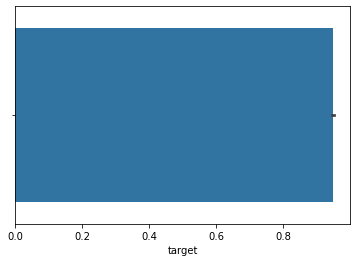

In [9]:
sns.barplot(x='target',data=df)

In [10]:
data =df[['target', 'text']]
data.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [11]:
data.columns = ["sentiment", "text"]
data.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [12]:
data[data['sentiment'] != 0].head()
data['sentiment'] = data['sentiment'].replace(4,1)

## Simple Preprocessing & Tokenization
The first thing to do for any data science task is to clean the data. For NLP, we apply various processing like converting all the words to lower case, trimming spaces, removing punctuations. This is something we will do over here too.

Additionally, we can also remove stop words like 'and', 'or', 'is', 'the', 'a', 'an' and convert words to their root forms like 'running' to 'run'.

In [13]:
!pip install python-Levenshtein

  Using cached python-Levenshtein-0.12.2.tar.gz (50 kB)
  Running setup.py clean for python-Levenshtein
Failed to build python-Levenshtein
    Running setup.py install for python-Levenshtein: started
    Running setup.py install for python-Levenshtein: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'E:\anaconda\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Maazullah Khan Warsi\\AppData\\Local\\Temp\\pip-install-lo333ys8\\python-levenshtein_57ae2ffae14e4c219ad9d16b39bf54cf\\setup.py'"'"'; __file__='"'"'C:\\Users\\Maazullah Khan Warsi\\AppData\\Local\\Temp\\pip-install-lo333ys8\\python-levenshtein_57ae2ffae14e4c219ad9d16b39bf54cf\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Maazullah Khan Warsi\AppData\Local\Temp\pip-wheel-unnwdkue'
       cwd: C:\Users\Maazullah Khan Warsi\AppData\Local\Temp\pip-install-lo333ys8\python-levenshtein_57ae2ffae14e4c219ad9d16b39bf54cf\
  Complete output (27 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-

In [14]:
!pip install wordcloud
import wordcloud

In [15]:
# to lower all capitals
data['clean_news']=data['text'].str.lower()
data['clean_news']

0          @switchfoot http://twitpic.com/2y1zl - awww, t...
1          is upset that he can't update his facebook by ...
2          @kenichan i dived many times for the ball. man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1048570             my grandma is making dinenr with my mum 
1048571    mid-morning snack time... a bowl of cheese noo...
1048572    @shadela same here  say it like from the termi...
1048573               @destinyhope92 im great thaanks  wbuu?
1048574                 cant wait til her date this weekend 
Name: clean_news, Length: 1048575, dtype: object

In [16]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['clean_news'] = data['clean_news'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
data.head()

,sentiment,text,clean_news
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his Facebook by ...,upset can't update facebook texting it... migh...
2,0,@Kenichan I dived many times for the ball. Man...,@kenichan dived many times ball. managed save ...
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, behaving all. i'm mad. he..."


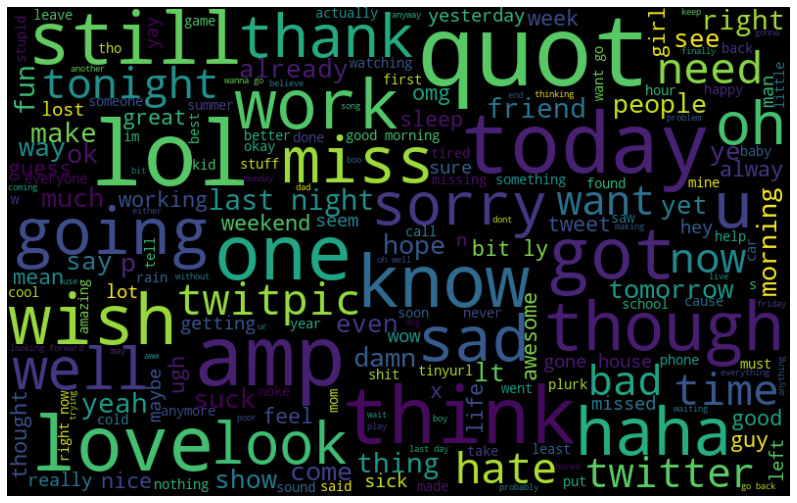

In [17]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in data['clean_news']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

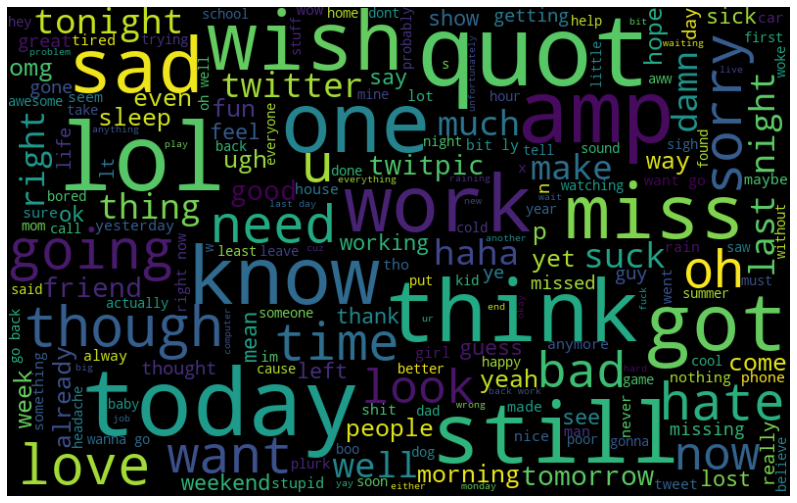

In [18]:
# visualize the frequent words for genuine news
all_words = " ".join([sentence for sentence in data['clean_news'][data['sentiment']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

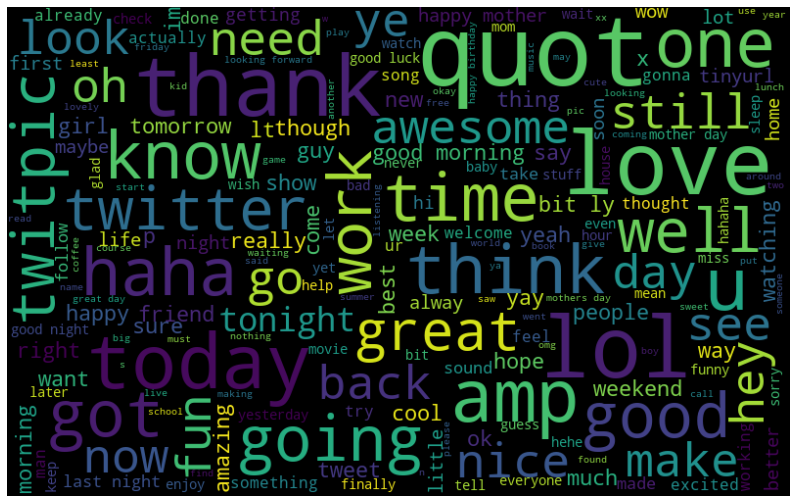

In [19]:
# visualize the frequent words for fake news
all_words = " ".join([sentence for sentence in data['clean_news'][data['sentiment']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
pip install --upgrade gensim

Note: you may need to restart the kernel to use updated packages.


In [21]:
import gensim

In [69]:
review_text = data.text.apply(gensim.utils.simple_preprocess)

In [23]:
data['clean_text']=data.text.apply(gensim.utils.simple_preprocess)

In [24]:
data.head(2)

,sentiment,text,clean_news,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t...","[switchfoot, http, twitpic, com, zl, awww, tha..."
1,0,is upset that he can't update his Facebook by ...,upset can't update facebook texting it... migh...,"[is, upset, that, he, can, update, his, facebo..."


In [70]:
review_text

0          [switchfoot, http, twitpic, com, zl, awww, tha...
1          [is, upset, that, he, can, update, his, facebo...
2          [kenichan, dived, many, times, for, the, ball,...
3          [my, whole, body, feels, itchy, and, like, its...
4          [nationwideclass, no, it, not, behaving, at, a...
                                 ...                        
1048570     [my, grandma, is, making, dinenr, with, my, mum]
1048571    [mid, morning, snack, time, bowl, of, cheese, ...
1048572    [shadela, same, here, say, it, like, from, the...
1048573              [destinyhope, im, great, thaanks, wbuu]
1048574          [cant, wait, til, her, date, this, weekend]
Name: text, Length: 1048575, dtype: object

In [71]:
review_text.loc[0]

['switchfoot',
 'http',
 'twitpic',
 'com',
 'zl',
 'awww',
 'that',
 'bummer',
 'you',
 'shoulda',
 'got',
 'david',
 'carr',
 'of',
 'third',
 'day',
 'to',
 'do',
 'it']

In [27]:
data['clean_text']

0          [switchfoot, http, twitpic, com, zl, awww, tha...
1          [is, upset, that, he, can, update, his, facebo...
2          [kenichan, dived, many, times, for, the, ball,...
3          [my, whole, body, feels, itchy, and, like, its...
4          [nationwideclass, no, it, not, behaving, at, a...
                                 ...                        
1048570     [my, grandma, is, making, dinenr, with, my, mum]
1048571    [mid, morning, snack, time, bowl, of, cheese, ...
1048572    [shadela, same, here, say, it, like, from, the...
1048573              [destinyhope, im, great, thaanks, wbuu]
1048574          [cant, wait, til, her, date, this, weekend]
Name: clean_text, Length: 1048575, dtype: object

In [29]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [31]:
# remove twitter handles (@user)
data['clean_tweet'] = np.vectorize(remove_pattern)(data['text'], "@[\w]*")

In [32]:
# remove special characters, numbers and punctuations
data['clean_tweet'] = data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
data.head()

,sentiment,text,clean_news,clean_text,clean_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t...","[switchfoot, http, twitpic, com, zl, awww, tha...",http twitpic com y zl Awww that s a bum...
1,0,is upset that he can't update his Facebook by ...,upset can't update facebook texting it... migh...,"[is, upset, that, he, can, update, his, facebo...",is upset that he can t update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,@kenichan dived many times ball. managed save ...,"[kenichan, dived, many, times, for, the, ball,...",I dived many times for the ball Managed to s...
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire,"[my, whole, body, feels, itchy, and, like, its...",my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, behaving all. i'm mad. he...","[nationwideclass, no, it, not, behaving, at, a...",no it s not behaving at all i m mad why am...


In [33]:
# remove short words
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
data.head()

,sentiment,text,clean_news,clean_text,clean_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t...","[switchfoot, http, twitpic, com, zl, awww, tha...",http twitpic Awww that bummer shoulda David Ca...
1,0,is upset that he can't update his Facebook by ...,upset can't update facebook texting it... migh...,"[is, upset, that, he, can, update, his, facebo...",upset that update Facebook texting might resul...
2,0,@Kenichan I dived many times for the ball. Man...,@kenichan dived many times ball. managed save ...,"[kenichan, dived, many, times, for, the, ball,...",dived many times ball Managed save rest bounds
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire,"[my, whole, body, feels, itchy, and, like, its...",whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, behaving all. i'm mad. he...","[nationwideclass, no, it, not, behaving, at, a...",behaving here because over there


In [39]:
# individual words considered as tokens
tokenized_tweet = data['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [http, twitpic, Awww, that, bummer, shoulda, D...
1    [upset, that, update, Facebook, texting, might...
2    [dived, many, times, ball, Managed, save, rest...
3              [whole, body, feels, itchy, like, fire]
4               [behaving, here, because, over, there]
Name: clean_tweet, dtype: object

In [40]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [http, twitpic, awww, that, bummer, shoulda, d...
1    [upset, that, updat, facebook, text, might, re...
2    [dive, mani, time, ball, manag, save, rest, bo...
3               [whole, bodi, feel, itchi, like, fire]
4                   [behav, here, becaus, over, there]
Name: clean_tweet, dtype: object

In [49]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
data['clean_tweet'] = tokenized_tweet
data.head()

,sentiment,text,clean_news,clean_text,clean_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t...",NaN,h t t p t w i t p i c a w w w t h a t ...
1,0,is upset that he can't update his Facebook by ...,upset can't update facebook texting it... migh...,NaN,u p s e t t h a t u p d a t f a c e b o ...
2,0,@Kenichan I dived many times for the ball. Man...,@kenichan dived many times ball. managed save ...,NaN,d i v e m a n i t i m e b a l l m a n ...
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire,NaN,w h o l e b o d i f e e l i t c h i l ...
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, behaving all. i'm mad. he...",NaN,b e h a v h e r e b e c a u s o v e r ...


TF-IDF Vectoriser
Term Frequency Inverse Document Frequency
TF-IDF indicates what the importance of the word is in order to understand the document or dataset. Let us understand with an example. Suppose you have a dataset where students write an essay on the topic, My House. In this dataset, the word a appears many times; it’s a high frequency word compared to other words in the dataset. The dataset contains other words like home, house, rooms and so on that appear less often, so their frequency are lower and they carry more information compared to the word. This is the intuition behind TF-IDF.

TF-IDF Vectoriser converts a collection of raw documents to a matrix of TF-IDF features. The Vectoriser is usually trained on only the X_train dataset.

ngram_range is the range of number of words in a sequence. [e.g "very expensive" is a 2-gram that is considered as an extra feature separately from "very" and "expensive" when you have a n-gram range of (1,2)]

max_features specifies the number of features to consider. [Ordered by feature frequency across the corpus].

gives weight to each word and tells how important the word is.
Importances increases proportionally to the number of times a word appears in the sentence but is penalized by the frequency of the word in all the sentences
Weight is the product of term frquency(frequency of a word occuring in a sentence) and inverse document frequency(measures how important the word is)
weight = term frequency * inverse document frequency
ranage(1,2) means vectorizer will consider a single word or pair of word for calculation
range(2,2) means a pair of word only
strip_accent to protect against unwanted encoding

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(data['clean_text'])

In [52]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
data.head()

,sentiment,text,clean_news,clean_text,clean_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t...",NaN,h p w p c w w w h b u e r h u l v c r r h r
1,0,is upset that he can't update his Facebook by ...,upset can't update facebook texting it... migh...,NaN,u p e h u p f c e b k e x g h r e u l c h l l ...
2,0,@Kenichan I dived many times for the ball. Man...,@kenichan dived many times ball. managed save ...,NaN,v e n e b l l n g v e r e b u n
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire,NaN,w h l e b f e e l c h l k e f r e
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, behaving all. i'm mad. he...",NaN,b e h v h e r e b e c u v e r h e r e


In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['clean_news'], data['sentiment'], random_state=42, test_size=0.25)

In [56]:
model.fit(x_train, y_train)
labels = model.predict(x_test)

In [73]:
def predict_category(s, train=x_train, model=model):
    pred = model.predict([s])
    return y_train.keys[pred[0]]

In [74]:
predict_category('Sending load to International Space Station ISS')

AttributeError: 'Word2Vec' object has no attribute 'predict'

In [72]:
x_train

240257    @jeremywright aware dance moves wonderwall, ma...
323839    @tuid haha. rather addictive. amusing someone ...
233260    anyone know whatever happened oblique strategi...
879942           finally delaware! two hours til get beach.
90535                                 really need followers
                                ...                        
259178        song's middle change want born..... arghhhh!!
365838    @ddlovato i'm trying reach dreams, seems impos...
131932                @proudgamertweet rather average 32370
671155    pickin @misstinayao waitin @sadittysash 2 hurr...
121958     @ home studying maths wooot ! im going fail shit
Name: clean_news, Length: 786431, dtype: object

In [64]:
y_train

240257    0
323839    0
233260    0
879942    1
90535     0
         ..
259178    0
365838    0
131932    0
671155    0
121958    0
Name: sentiment, Length: 786431, dtype: int64

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [66]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

ValueError: could not convert string to float: '@jeremywright aware dance moves wonderwall, makes bail even difficult. jam along spirit!'

In [ ]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

In [ ]:
accuracy_score(y_test,pred)

## Training the Word2Vec Model
Train the model for reviews. Use a window of size 10 i.e. 10 words `before the present word and 10 words ahead. A sentence with at least 2 words should only be considered, configure this using min_count parameter.

Workers define how many CPU threads to be used.

In [67]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)

In [75]:
model.build_vocab(review_text, progress_per=1000)

In [76]:
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

(52491677, 65597450)

In [77]:
model.wv.most_similar("bad")

[('good', 0.6647034883499146),
 ('terrible', 0.6273022294044495),
 ('horrible', 0.5799519419670105),
 ('shitty', 0.5454033613204956),
 ('shabby', 0.5326284170150757),
 ('weak', 0.5265448689460754),
 ('crappy', 0.5193057656288147),
 ('much', 0.4974897503852844),
 ('rough', 0.48825591802597046),
 ('badly', 0.4852873384952545)]

In [78]:
x=review_text
y=data['sentiment']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, random_state=42, test_size=0.25, stratify = y)
X_train = X_train.reset_index()
X_test = X_test.reset_index()
Y_train = Y_train.to_frame()
Y_train = Y_train.reset_index()
Y_test = Y_test.to_frame()
Y_test = Y_test.reset_index()
print(X_train.head())
train_x2 = X_train['text'].to_list()
#test_x2 = test_x['review'].to_list()

    index                                               text
0  536242  [good, morning, doesnt, feel, like, going, to,...
1  172881  [grrr, hate, when, make, careless, mistakes, o...
2  653362  [is, not, liking, this, whole, being, alone, i...
3   19071  [is, on, myspace, facebook, msn, and, doin, work]
4  449668  [lol, jessidavis_, no, not, me, and, damondccl...


In [80]:
# PREPROCESSING THE DATA

# TRAIN THE MODEL ON TRAIN SET
from gensim.models import Word2Vec
model = Word2Vec(x_train, min_count = 1)
key_index = model.wv.key_to_index
train_x2 = X_train['text'].to_list()
# MAKE A DICT
we_dict = {word:model.wv[word] for word in key_index}

# CONVERT TO DATAFRAME
import pandas as pd
new = pd.DataFrame.from_dict(we_dict)

In [81]:
new.head(3)

,,e,a,o,t,i,n,s,r,l,...,%,^,`,\,},{,,ü,é,å
0,0.540702,0.724802,-0.389951,-0.533655,-0.407393,0.380164,-0.007118,0.093493,0.212136,0.303145,...,1.713183,2.960082,0.222564,0.581174,0.747173,0.916777,0.047402,0.005263,0.008313,-0.008936
1,0.607661,0.330328,0.291820,0.246114,-0.120964,0.070685,-0.075745,0.141692,0.162933,0.448499,...,0.364106,-0.487654,-0.118760,-2.574133,-0.816118,-0.514860,0.089852,0.000630,0.003372,0.011146
2,0.057029,-0.766303,-0.331138,-0.180053,-0.681375,-0.396158,-0.550842,-0.325721,-0.452841,-0.363524,...,2.015247,-1.476097,-0.238611,-0.291951,-0.186773,-0.187352,-0.056716,0.001075,0.012954,0.005662


In [82]:
Y_train

,index,sentiment
0,536242,0
1,172881,0
2,653362,0
3,19071,0
4,449668,0
...,...,...
786426,344310,0
786427,82571,0
786428,544867,0
786429,380436,0


In [ ]:
new.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
# training
model = LogisticRegression()
model.fit(new, Y_train['sentiment'])

In [ ]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

## Save the Model
Save the model so that it can be reused in other applications


In [ ]:
model.save("./word2vec-amazon-cell-accessories-reviews-short.model")

In [ ]:
model.wv.most_similar("bad")

In [ ]:
model.wv.similarity(w1="cheap", w2="inexpensive")

In [ ]:
model.wv.similarity(w1="great", w2="good")